<a href="https://colab.research.google.com/github/Shankjbs571/Machine-Learning-Techniques/blob/main/Reso_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sklearn
import numpy as np

# from sklearn.preprocessing import
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [3]:
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ResoluteAI/T1_train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ResoluteAI/T1_test.csv')
print(test_dataset.info())
print(dataset.head())


#looking for uniue target
print(dataset['target'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      15752 non-null  int64
 1   T2      15752 non-null  int64
 2   T3      15752 non-null  int64
 3   T4      15752 non-null  int64
 4   T5      15752 non-null  int64
 5   T6      15752 non-null  int64
 6   T7      15752 non-null  int64
 7   T8      15752 non-null  int64
 8   T9      15752 non-null  int64
 9   T10     15752 non-null  int64
 10  T11     15752 non-null  int64
 11  T12     15752 non-null  int64
 12  T13     15752 non-null  int64
 13  T14     15752 non-null  int64
 14  T15     15752 non-null  int64
 15  T16     15752 non-null  int64
 16  T17     15752 non-null  int64
 17  T18     15752 non-null  int64
dtypes: int64(18)
memory usage: 2.2 MB
None
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -7

In [5]:
encoder = OrdinalEncoder()
encoded_target = encoder.fit_transform(dataset[['target']])
encoded_target
encoded_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out(['target']))
print(encoded_df)


       target
0       110.0
1       137.0
2        10.0
3        14.0
4        26.0
...       ...
36747   107.0
36748    86.0
36749    55.0
36750    91.0
36751   119.0

[36752 rows x 1 columns]


In [13]:
dataset.drop(['target'],axis=1, inplace=True)
print(dataset.info())
# concat_dataset = pd.concat([dataset, encoded_df], axis=1)
# print(concat_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T1      36752 non-null  int64
 1   T2      36752 non-null  int64
 2   T3      36752 non-null  int64
 3   T4      36752 non-null  int64
 4   T5      36752 non-null  int64
 5   T6      36752 non-null  int64
 6   T7      36752 non-null  int64
 7   T8      36752 non-null  int64
 8   T9      36752 non-null  int64
 9   T10     36752 non-null  int64
 10  T11     36752 non-null  int64
 11  T12     36752 non-null  int64
 12  T13     36752 non-null  int64
 13  T14     36752 non-null  int64
 14  T15     36752 non-null  int64
 15  T16     36752 non-null  int64
 16  T17     36752 non-null  int64
 17  T18     36752 non-null  int64
dtypes: int64(18)
memory usage: 5.0 MB
None


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
T1,36752.0,-65.865449,8.737286,-95.0,-72.0,-66.0,-61.0,-41.0
T2,36752.0,-64.521931,8.914559,-95.0,-70.0,-65.0,-59.0,-37.0
T3,36752.0,-64.574472,8.154517,-95.0,-70.0,-64.0,-59.0,-41.0
T4,36752.0,-65.296474,8.142803,-95.0,-70.0,-66.0,-61.0,-39.0
T5,36752.0,-64.462152,8.068375,-95.0,-69.0,-65.0,-59.0,-36.0
T6,36752.0,-63.318731,8.651501,-95.0,-69.0,-63.0,-57.0,-39.0
T7,36752.0,-67.030202,9.257529,-95.0,-74.0,-66.0,-60.0,-45.0
T8,36752.0,-66.591260,10.160193,-95.0,-75.0,-66.0,-59.0,-39.0
T9,36752.0,-65.692479,10.598247,-95.0,-73.0,-65.0,-58.0,-39.0
T10,36752.0,-65.555181,10.408147,-95.0,-73.0,-65.0,-58.0,-37.0


32.0     635
26.0     633
21.0     432
22.0     429
119.0    428
        ... 
19.0     191
141.0    191
65.0     190
9.0      189
79.0     188
Name: target, Length: 160, dtype: int64


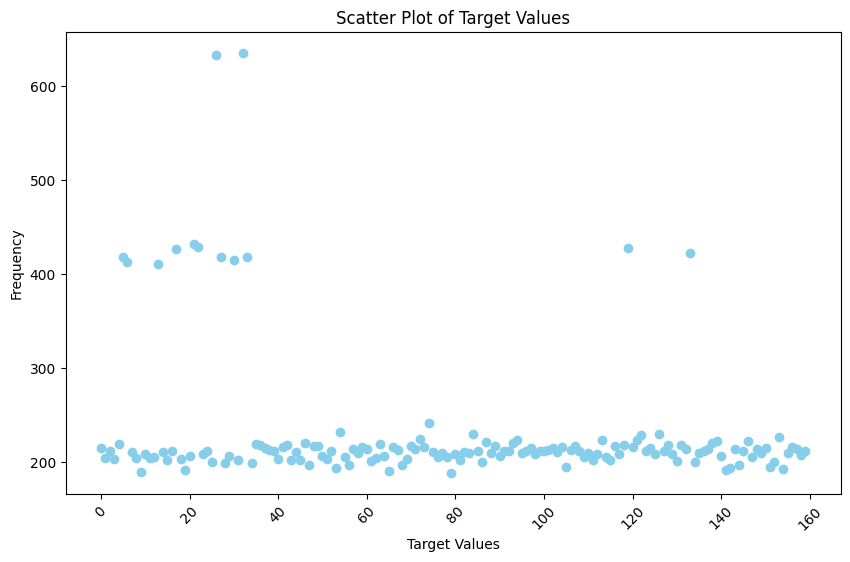

In [ ]:
print(concat_dataset['target'].value_counts())
value_counts = concat_dataset['target'].value_counts()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Target Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
import seaborn as sns


<ipython-input-9-ad235898e67b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cor_data.corr()


<Axes: >

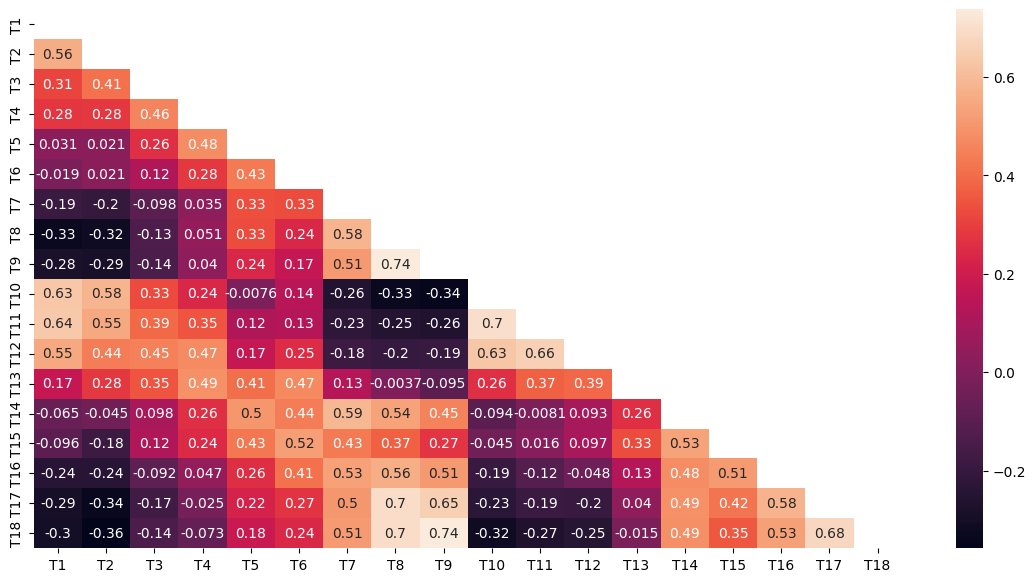

In [9]:
cor_data = dataset.copy()
corr_matrix = cor_data.corr()
plt.figure(figsize=(14,7))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask= mask)

<class 'numpy.ndarray'>
[[  2.67036752   0.47261935]
 [-26.27244163  16.99213583]
 [ 17.80799809 -22.04531909]
 ...
 [ 40.03299512  13.4584367 ]
 [ 26.78660198   2.48427013]
 [-20.71819752   6.94344285]]


<ipython-input-10-0321100cc1e0>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


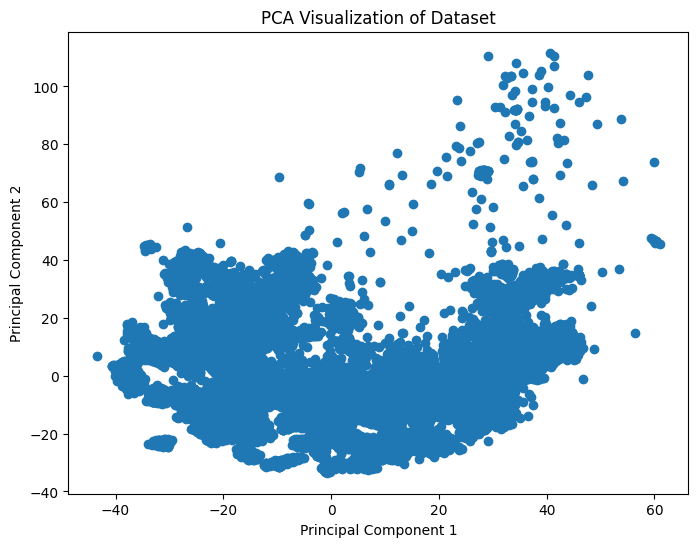

In [10]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(dataset.iloc[:,:17])
print(type(X_pca))
print(X_pca)
# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dataset')
# plt.colorbar(label='Target')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [41]:
dataset.shape

(36752, 18)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 2 ... 0 0 1]


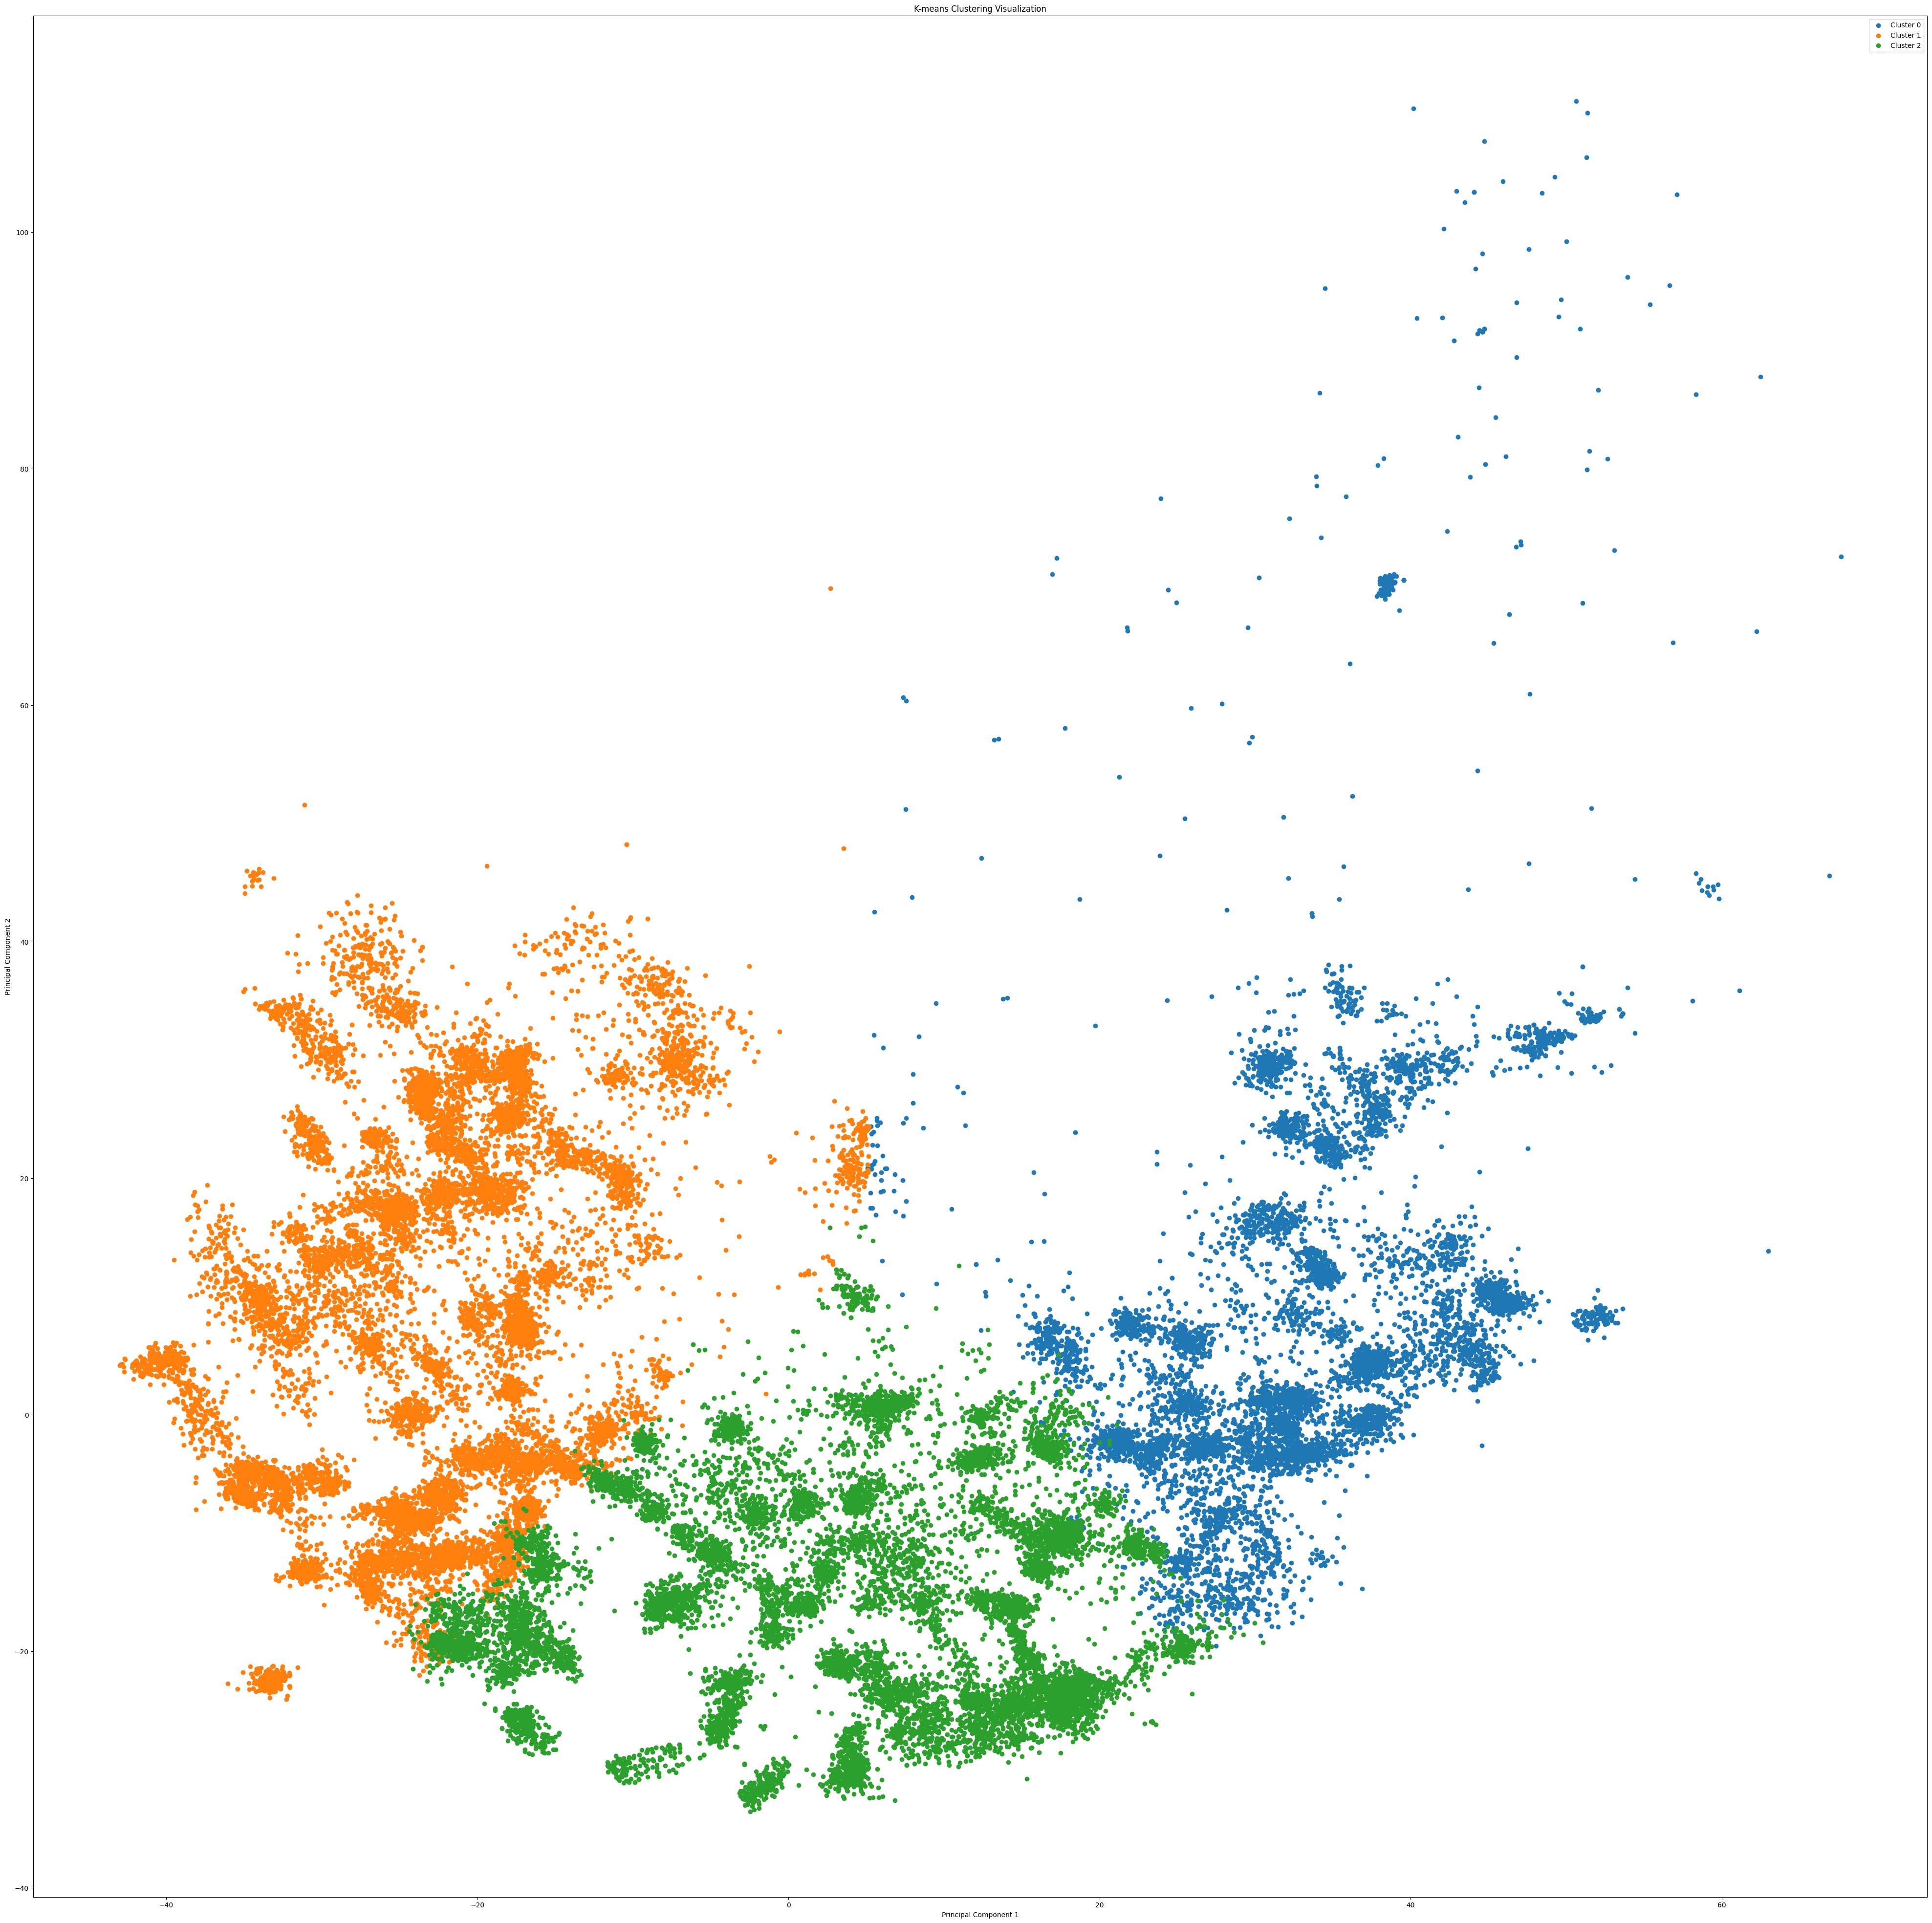

In [14]:

k = 3 # Number of clusters
kmeans_model = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans_model.fit_predict(dataset)
print(cluster_labels)

# Reducing dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dataset)

# Visualizing the clusters
plt.figure(figsize=(50, 50))
for cluster in range(k):
    plt.scatter(pca_data[cluster_labels == cluster, 0], pca_data[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.legend()
plt.show()

In [44]:
print(cluster_labels)
cluster_labels_df = pd.DataFrame(cluster_labels,columns=['cluster_label'])
print(cluster_labels_df)

dataset_with_clusters = pd.concat([dataset, cluster_labels_df],axis=1)
print(dataset_with_clusters.head())
centroids = kmeans_model.cluster_centers_
print(centroids)

[2 1 2 ... 0 0 1]
       cluster_label
0                  2
1                  1
2                  2
3                  0
4                  2
...              ...
36747              0
36748              2
36749              0
36750              0
36751              1

[36752 rows x 1 columns]
   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18  cluster_label  
0  -77              2  
1  -63              1  
2  -77              2  
3  -73              0  
4  -80              2  
[[-60.22578429 -59.88481795 -64.97114724 -69.44790474 -71.20677811
  -70.

In [35]:
import io
import pandas as pd
input_Sample = pd.DataFrame(
np.array([-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60]).reshape(1,-1))
# , columns=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18'])
print(input_Sample.shape)

(1, 18)


In [39]:
kmeans_model.predict(input_Sample)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [43]:
from sklearn.metrics import euclidean_distances

In [45]:
distances = euclidean_distances(input_Sample, centroids)
print("Distances:")
print(distances)

Distances:
[[57.19461838 40.40897415 59.75882303]]


In [16]:
!pip install joblib

In [17]:
import joblib

joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [18]:
from google.colab import files

# Download the saved model file
files.download('kmeans_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

In [ ]:

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(dataset_with_clusters, encoded_df.values.ravel(), test_size=0.2, random_state=42)

# # Standardize the features (optional but recommended for many classification algorithms)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train a logistic regression model
# model = LogisticRegression(solver='sag',max_iter=1000)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

Accuracy: 0.970888314515032


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score


# # Calculate precision, recall, and F1-score
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")

Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [ ]:
#@title Code for Streamlit App Task 1

import streamlit as st
import joblib
import numpy as np
import pandas as pd
# import sklearn
import numpy as np
from sklearn.metrics import euclidean_distances

# # from sklearn.preprocessing import
# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA
model = joblib.load('kmeans_model.pkl')

def main():
    st.title('KMeans Clustering Task 1')
    st.write('Enter values for each feature:')
    features = []
    for i in range(18):  # Assuming you have 18 features
        feature_value = st.number_input(f'T{i+1}', value=0.0)
        features.append(feature_value)
    input_sample = np.array(features).reshape(1, -1)

    if st.button('Predict'):

        prediction = model.predict(input_sample)
        st.write(f'Predicted cluster: {prediction[0]}')

        centroids = model.cluster_centers_
        distances = euclidean_distances(input_sample, centroids)
        for i, distance in enumerate(distances[0]):
            st.write(f'Euclidean distance to centroid {i}: {distance}')

if __name__ == '__main__':
    main()
